In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


# What is Logistic Regression?
It is a classification algorithm and not a regression. It predicts the probability that an input belongs to a class (group), usually a binary one (0 or 1, yes or no, etc.).

It's best used:

* When you need a probabilistic classification.
* There exists a linear relationship between feature and target.
* Most features are numeric.
* When an interpretable result is required (you can say e.g "Credit Score increases the odds by a certain percentage)

# What is a Decision Tree?
It is a tree-like structure that splits data into branches on feature values. At each node (fork), it asks a yes/no question to partition data. Eventually you end up in a leaf node that gives a prediction. Can be used for classification and/or regression.

It's best used:

* When data has no linear relationship.
* When you want to see why the model made a specific prediction.
* When there exist both features that are numeric and categorical.
* When working with a dataset with lots of missing values.

# Loan Default Classifier

The aim of the project is to predict if a borrower will default on a loan or not, based on historical data and borrower characteristics. This allows lenders to make informed decisions about loan approvals, interest rates, and risk management.

The classification we will use focuses on understanding which features (such as income_annum, CIBIL_score, etc.) are most predictive of default risk. 

This project aims to improve credit risk screening, reduce default rates, and enhance lending strategies through predictive analytics.

In [2]:
#Import all the necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load and Inspect the data

df = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Approved = 0 , Rejected = 1

In [5]:
# Lets us know the shape of our data (Number of rows and columns)
df.shape

(4269, 13)

In [6]:
#Lets us know if we have any empty cells exist(Returns True if so and False if not.)
df.isnull().values.any()

False

# Recap

From the above, we see that we have 13 columns and 4269 rows. We have also checked if we have any empty cells. We can also see that the education column and self-employed column are not numeric. This means that our ML models will not be able to read the data in those columns.

We will have to convert the columns using a process called encoding. Encoding is converting words (yes or no) into numbers (1 or 0). We use a tool from the scikit-learn library called LableEncoder.

In [7]:
#Removes hidden whitespaces

df.columns = df.columns.str.strip()

In [8]:
#Check to see if column actually exists

# Should print: True

print('education' in df.columns)

# Should print Gradute or Not Graduate 
print(df['education'].unique())

True
[' Graduate' ' Not Graduate']


In [9]:
df['education'] = LabelEncoder().fit_transform(df['education'])
df['self_employed'] =LabelEncoder().fit_transform(df['self_employed'])
df['loan_status'] = LabelEncoder().fit_transform(df['loan_status'])

Lets see the change

In [10]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


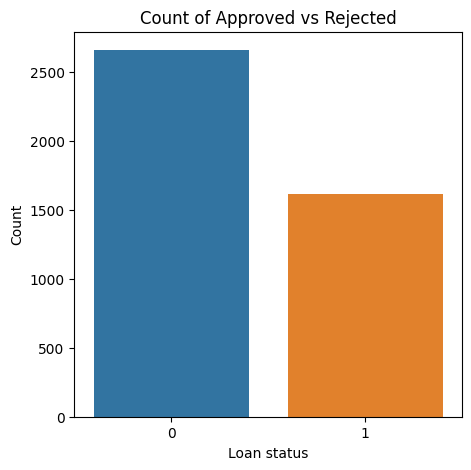

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x='loan_status', data=df)
plt.xlabel('Loan status')
plt.ylabel('Count')
plt.title('Count of Approved vs Rejected')
plt.show()

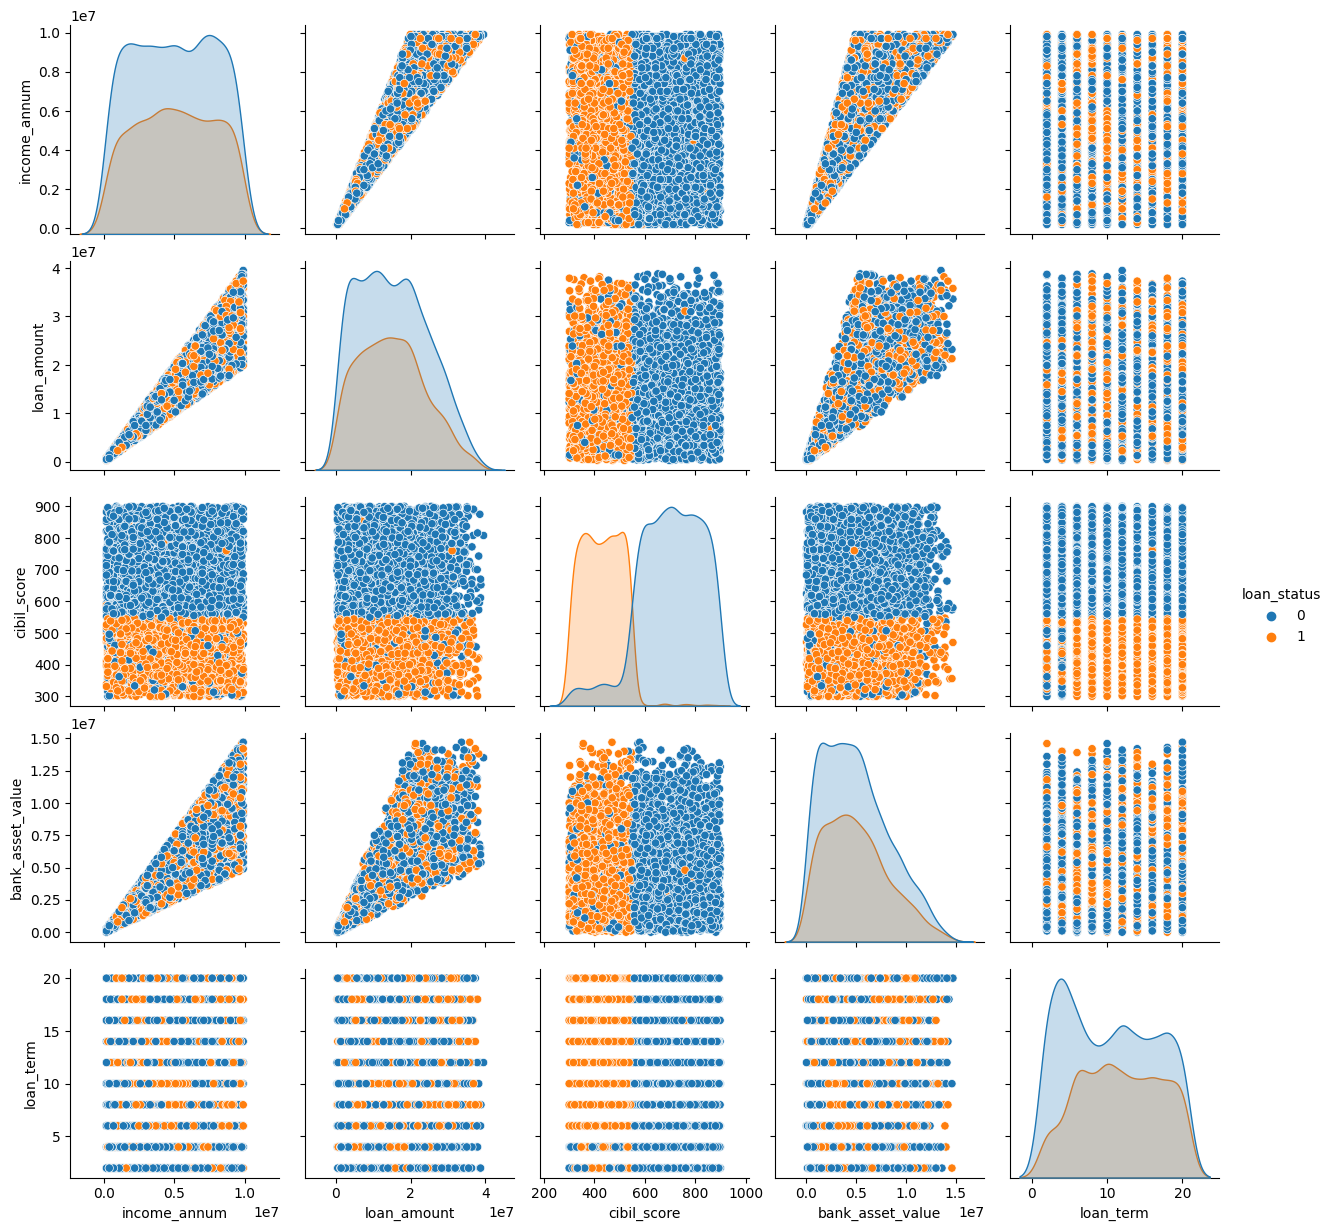

In [12]:
import warnings
warnings.filterwarnings('ignore')
small_features = ['income_annum', 'loan_amount', 'cibil_score', 'bank_asset_value', 'loan_term']
sns.pairplot(df, hue = 'loan_status',vars = small_features)

plt.show()

#  Short summary of the analysis

1. Loan amount vs Income.

   
    No clear relationship appears between the two, but if you look closely, you will see some defaults (orange dots) have high incomes but still high loan amounts, suggesting over-borrowing might be a risk sign.

    Something to consider is to compute a new feature: loan_to_income_ratio = loan_amount/income_annum. This is more informative for insights than looking at income or loan amount on their own.

2. Loan Amount vs CIBIL Score.

    These two have no real relation, but a higher CIBIL score leads to a better outcome. The orange dots (defaults) are densely grouped at lower CIBIL scores, especially below 600. At high scores (>700), almost all dots are blue (non-defaults). This is a clear indicator that CIBIL is a highly predictive feature. We will confirm this below.

3. Income vs Loan Status.

   From the (income_annum vs income_annum) graph, we see defaults (orange) mostly fall in lower income ranges. This supports the idea that lower income correlates with higher defaults.

4. Bank asset value vs. default.

      From the (bank_asset_value vs bank_asset_value) graph. Non-defaulters (blue) own higher-value assets compared to their defaulter (orange) counterparts, who are more densely grouped on the bottom end. This suggests collateral strength or wealth might play a role.

5. Loan term
   Defaults seem to increase at higher loan terms, suggesting that longer repayment periods might increase risk.

<Axes: xlabel='loan_status', ylabel='cibil_score'>

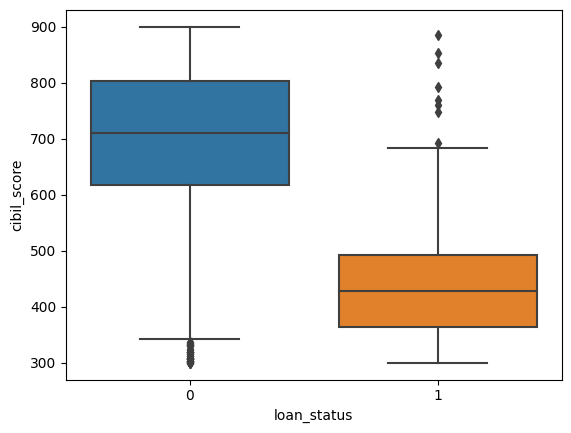

In [13]:
sns.boxplot(x='loan_status', y='cibil_score', data=df)

This visual confirms that at high scores (>700), almost all dots are blue (non-defaults). This is a clear indicator that CIBIL is a highly predictive feature.

In [14]:
df['loan_to_income_ratio'] = df['loan_amount'] / (df['income_annum'] + 1)
df['bank_asset_to_loan_ratio'] = df['bank_asset_value'] / (df['loan_amount'] + 1)

<Axes: xlabel='loan_status', ylabel='loan_to_income_ratio'>

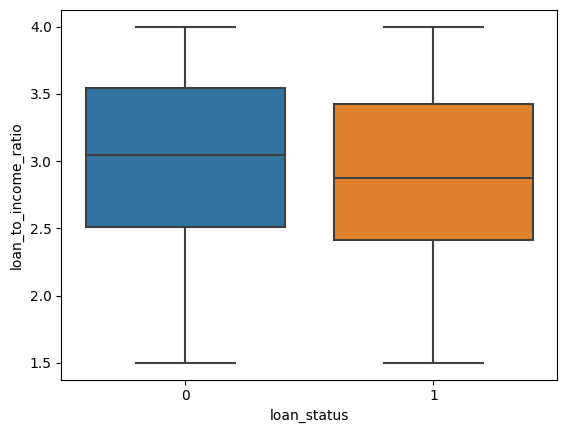

In [15]:
sns.boxplot(x='loan_status', y='loan_to_income_ratio', data=df)

The median for the approved/non-defaulters is higher than those of the rejected/defaulters. This is a red flag and could be a signal of "over-borrowing" and imply greater financial strain or risk for/from borrowers.

1. Approval process sensitivity:
    * The approval process might not be sensitive to loan-to-income ratios.
    * This lack of sensitivity could allow applicants with high loan-to-income ratios to get approved, which may lead to a gap in loan approval criteria and leave the lending institution open to silent defaults.
2. Train Our Model.
   * We should test to see what sort of effect it has on the outcomes of what our models predict.

We would expect defaulters (orange) to have a higher loan-to-income ratio

<Axes: xlabel='loan_status', ylabel='bank_asset_to_loan_ratio'>

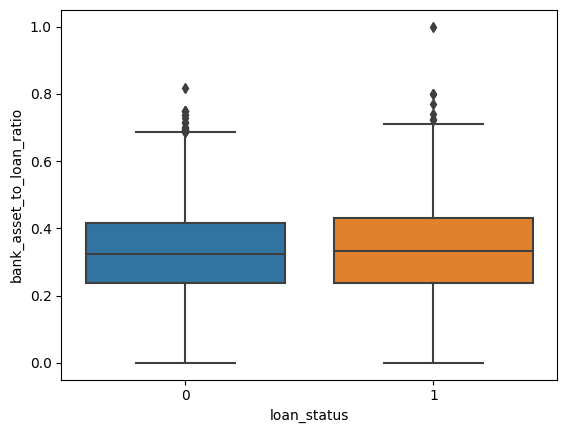

In [16]:
sns.boxplot(x='loan_status', y='bank_asset_to_loan_ratio', data=df)

In [17]:
df['Combine_asset_value'] = df['residential_assets_value']+df['commercial_assets_value']+df['luxury_assets_value']+df['bank_asset_value']
df['Combine_asset_to_loan_ratio'] = df['bank_asset_value'] / (df['loan_amount'] + 1)

<Axes: xlabel='loan_status', ylabel='Combine_asset_to_loan_ratio'>

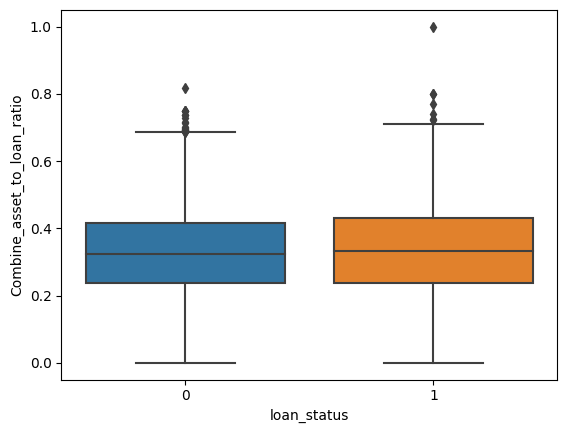

In [18]:
sns.boxplot(x='loan_status', y='Combine_asset_to_loan_ratio', data=df)

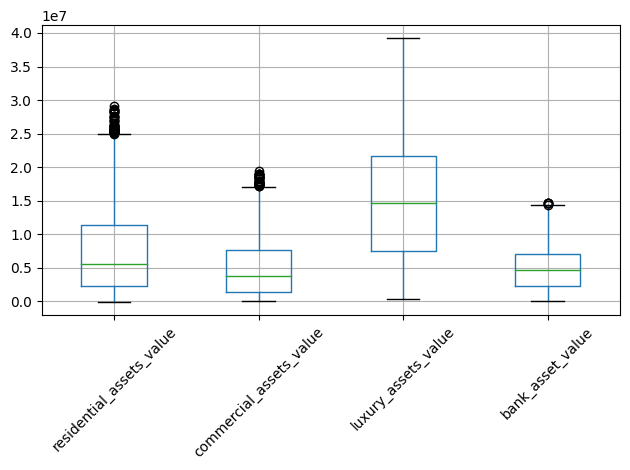

In [19]:
df[['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']].boxplot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df[['bank_asset_value', 'residential_assets_value', 
    'commercial_assets_value', 'luxury_assets_value']].corr()

,bank_asset_value,residential_assets_value,commercial_assets_value,luxury_assets_value
bank_asset_value,1.000000,0.527418,0.548576,0.788517
residential_assets_value,0.527418,1.000000,0.414786,0.590932
commercial_assets_value,0.548576,0.414786,1.000000,0.591128
luxury_assets_value,0.788517,0.590932,0.591128,1.000000


In [21]:
df.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)

loan_status                    1.000000
loan_term                      0.113036
Combine_asset_to_loan_ratio    0.041657
bank_asset_to_loan_ratio       0.041657
no_of_dependents               0.018114
luxury_assets_value            0.015465
income_annum                   0.015189
residential_assets_value       0.014367
Combine_asset_value            0.011281
bank_asset_value               0.006778
education                      0.004918
self_employed                 -0.000345
commercial_assets_value       -0.008246
loan_amount                   -0.016150
loan_id                       -0.017685
loan_to_income_ratio          -0.087726
cibil_score                   -0.770518
Name: loan_status, dtype: float64

# Feature Engineering and Target definintion.

In [62]:
features = [
    'loan_to_income_ratio','bank_asset_value','cibil_score','loan_term','income_annum'
]

x = df[features]
y = df['loan_status']

# Lets split the data

In [105]:

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state = 0)

# Training our models

In [83]:
#Decision Tree

tree = DecisionTreeClassifier(max_depth=4,random_state=0)

tree.fit(train_x,train_y)
tree.score(train_x,train_y)

0.9964860907759883

In [84]:
# test the model 

tree_pred = tree.predict(test_x)
accuracy_score(test_y,tree_pred)

0.9953161592505855

In [97]:
from sklearn.metrics import classification_report

print(classification_report(test_y, tree_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       523
           1       1.00      0.99      0.99       331

    accuracy                           1.00       854
   macro avg       1.00      0.99      1.00       854
weighted avg       1.00      1.00      1.00       854



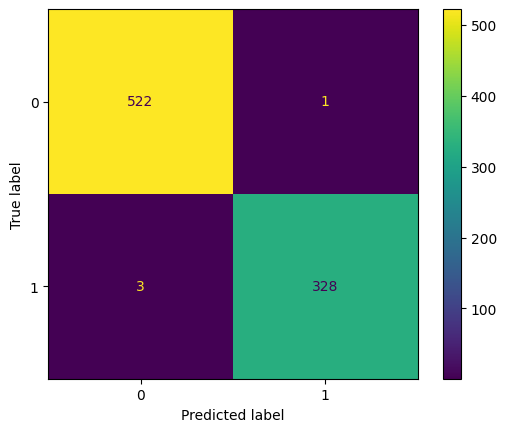

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_y, tree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [94]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(train_x,train_y)
logreg.score(train_x,train_y)

0.9121522693997072

In [95]:
#test the model
logreg_pred = logreg.predict(test_x)
accuracy_score(test_y,logreg_pred)

0.9215456674473068

In [98]:
from sklearn.metrics import classification_report

print(classification_report(test_y, logreg_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       523
           1       0.90      0.90      0.90       331

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854



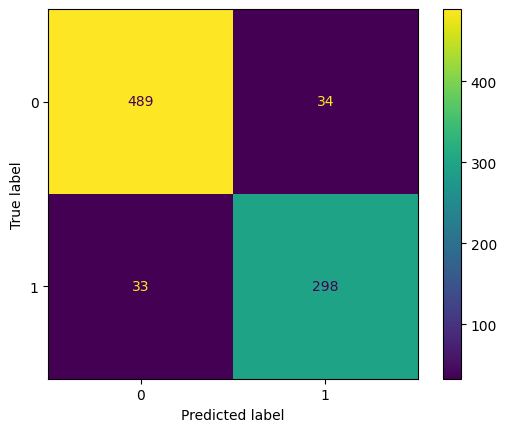

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_y, logreg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

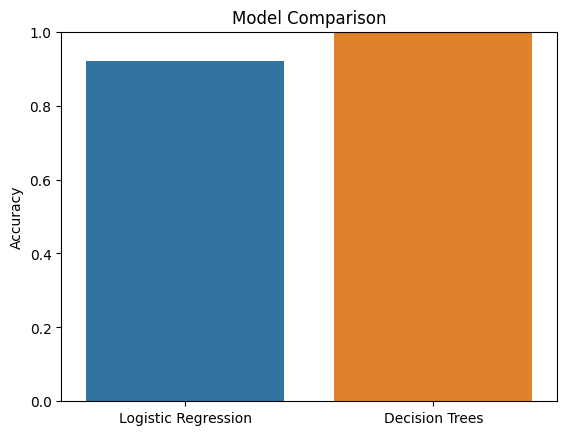

In [102]:
models = ['Logistic Regression', 'Decision Trees']
accuracies = [0.9215456674473068, 0.9953161592505855]  # replace with your actual scores

sns.barplot(x=models, y=accuracies)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()